In [81]:
'''This script demonstrates how to build a variational autoencoder
with Keras and deconvolution layers.
# Reference
- Auto-Encoding Variational Bayes
  https://arxiv.org/abs/1312.6114
'''
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import keras
from keras.layers import Input, Dense, Lambda, Flatten, Reshape, Conv1D
from keras.layers import Conv2D, Conv2DTranspose
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist

In [2]:
import config
import os, numpy as np, pandas, sklearn, scipy.signal as signal
import mido
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# local libs
import config, models, functions
from data import data, midi, midi_generators as g
from utils import io, models_io, utils, plot

 Context :: namedtuple(
[ max_t = float
, dt = float
, n_instances = int
, note_length = int
, bpm = float
, tempo = float
, ticks_per_beat = int
]



In [4]:
context = data.init()
n = 2
multiTrack = True
context, x_train, labels = data.import_data(data.init(), n, multiTrack=multiTrack)

Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Setting up params

max min f 25.0 0.3333333333333333
 >> Context(max_t=3.0, dt=0.02, n_instances=150, note_length=0.03, bpm=120.0, tempo=500000, ticks_per_beat=480)
Importing midi-data

 [INFO] : 
 |  reading file: ../datasets/examples/01 16th Snare.mid
 [INFO] : 
 |  reading file: ../datasets/examples/01 8th Cym.mid

Encoding midi-data
 [<midi file '../datasets/examples/01 16th Snare.mid' type 0, 1 tracks, 182 messages>, <midi file '../datasets/examples/01 8th Cym.mid' type 0, 1 tracks, 68 messages>]
> -> multi-track = True
<meta message track_name name='01 16th Snare\x00' time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
<meta message time_signature numerator=4 denominator=4 clocks_per_click=36 notated_32nd_notes_per_beat=8 time=0>
note_on channel=0 no

In [5]:
n = 100
min_f = 3
max_f = 15
# x_train = g.gen_data(context, n, max_f=max_f, min_f=min_f)
# x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, multiTrack=multiTrack)
x_train = g.gen_data_complex(context, n, max_f=max_f, min_f=min_f, 
    n_polyrythms=1,
    n_channels=midi.N_NOTES,
    multiTrack=multiTrack)

note_on channel=0 note=60 velocity=127 time=0.05416666666666667
note_on channel=0 note=61 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.015625
note_on channel=0 note=61 velocity=127 time=0.05
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.05
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on c

note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.029166666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.06041666666666667
note_on channel=0 note=61 velocity=127 time=0
note_on channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_on channel=0 note=61 velocity=127 time=0.046875
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.03958333333333333
note_off channel=0 note=62 velocity=

note_on channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=60 velocity=127 time=0.003125
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.027083333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.022916666666666665
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_on channel=

note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.013541666666666667
note_on channel=0 note=60 velocity=127 time=0.04895833333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.03229166666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0625
note_on channel=0 note=61 velocity=127 time=0.009375
note_on channel=0 note=62 velocity=127 time=0
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note

note_on channel=0 note=61 velocity=127 time=0.027083333333333334
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.030208333333333334
note_on channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.015625
note_on channel=0 note=61 velocity=127 time=0.036458333333333336
note_on channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 v

note_on channel=0 note=62 velocity=127 time=0.058333333333333334
note_on channel=0 note=61 velocity=127 time=0
note_on channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0
note_off channel=0 note=60 velocity=127 time=0.01875
note_on channel=0 note=62 velocity=127 time=0.034375
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0125
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.026041666666666668
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.007291666

note_on channel=0 note=60 velocity=127 time=0.015625
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.017708333333333333
note_on channel=0 note=60 velocity=127 time=0.017708333333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.02395833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_on channel=0 note=61 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0

note_on channel=0 note=61 velocity=127 time=0.015625
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_on channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.03854166666666667
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=60 velocity=127 time=0.003125
note_on channel=0 note=61 velocity=127 time=0.04375
note_on channel=0 note=62 velocity=127 time=0.0020833333333333333
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_off chann

note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.035416666666666666
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.040625
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04583333333333333
note_on channel=0 note=62 velocity=127 time=0.01979166

note_on channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.008333333333333333
note_on channel=0 note=61 velocity=127 time=0.021875
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.020833333333333332
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.05625
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=62 velocity=127 time=0
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.040625
note_off channel=0 note=60 velocity=127 time=

note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_on channel=0 note=62 velocity=127 time=0.017708333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.003125
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.01979166

note_off channel=0 note=62 velocity=127 time=0.017708333333333333
note_on channel=0 note=60 velocity=127 time=0.040625
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.017708333333333333
note_on channel=0 note=60 velocity=127 time=0.036458333333333336
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_on channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=62 velocity=127 time=0.017708333333333333
note_on channel=0 note=60 velocity=127 time=0.03229166666666666
note_on channel=0 note=61 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.005208333333333333


note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_on channel=0 note=60 velocity=127 time=0.052083333333333336
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.003125
note_on channel=0 note=60 velocity=127 time=0.04895833333333333
note_on channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.017708333333333333
note_on channel=0 note=60 velocity=127 time=0.028125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.02395833333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.008333333333333333
no

note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.06354166666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.022916666666666665
note_on channel=0 note=61 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.011458333333333333
note_on channel=0 note=62 velocity=127 time=0.03333333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.040625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.027083333333333334
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time

note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.029166666666666667
note_on channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_on channel=0 note=62 velocity=127 time=0.041666666666666664
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.020833333333333332
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.00625
note_on channel=0 note=61 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.013541666666666667
not

note_on channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_on channel=0 note=60 velocity=127 time=0.065625
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.011458333333333333
note_on channel=0 note=62 velocity=127 time=0.003125
note_off channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_on channel=0 note=60 velocity=127 time=0.057291666666666664
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_on channel=0 

note_on channel=0 note=60 velocity=127 time=0.011458333333333333
note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_on channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.020833333333333332
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.009375
note_on channel=0 note=60 velocity=127 time=0.020833333333333332
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.019791

note_on channel=0 note=60 velocity=127 time=0.008333333333333333
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velocity=127 time=0.005208333333333333
note_on channel=0 note=61 velocity=127 time=0.05520833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.027083333333333334
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.030208333333333334
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=61 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.03854166666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.030208333333333334
note_off channel=0 note=61 velocity=127 time=0.0

note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.03333333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.010416666666666666
note_off channel=0 note=62 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.010416666666666666
note_on channel=0 note=61 velocity=127 time=0.020833333333333332
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.029166666

note_on channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.017708333333333333
note_on channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.013541666666666667
note_on channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=60 velocity=127 time=0.014583333333333334
note_on channel=0 note=62 velocity=127 time=0.029166666666666667
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=62 velo

note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.015625
note_on channel=0 note=62 velocity=127 time=0.053125
note_on channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=61 velocity=127 time=0.00625
note_on channel=0 note=60 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.029166666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.02395833333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 not

note_on channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.0625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_on channel=0 note=60 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0625
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_on channel=0 note=61 velocity=127 time=0.04791666666666666
note

note_on channel=0 note=60 velocity=127 time=0.04375
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_on channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_on channel=0 note=60 velocity=127 time=0.053125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 ti

note_on channel=0 note=61 velocity=127 time=0.051041666666666666
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.0375
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=60 velocity=127 time=0.004166666666666667
note_on channel=0 note=62 velocity=127 time=0.10416666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.07083333333333333
note_on channel=0 note=61 velocity=127 time=0.014583333333333334
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.014583333333333334
note_on channel=0 note=62 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.10833333333333334
note_off channel=0 note=62 velocity=127 time=0.

note_on channel=0 note=62 velocity=127 time=0.015625
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_on channel=0 note=60 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.011458333333333333
note_on channel=0 note=62 velocity=127 time=0.04583333333333333
note_on channel=0 note=60 velocity=127 time=0.008333333333333333
note_off channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=60 velocity=127 time=0.008333333333333333
note_on channel=0 note=62 velocity=127 time=0.04895833333333333
note_on channel=0 note=60 velocity=127 time=0.005208333333333333
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.013541666666666667
note_off channel=0 note=60 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=62 vel

note_off channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.014583333333333334
note_on channel=0 note=61 velocity=127 time=0.02395833333333333
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.04583333333333333
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.0125
note_on channel=0 note=61 velocity=127 time=0.03854166666666667
note_on channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on chann

note_off channel=0 note=61 velocity=127 time=0.016666666666666666
note_off channel=0 note=62 velocity=127 time=0.004166666666666667
note_on channel=0 note=61 velocity=127 time=0.05520833333333333
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.017708333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.046875
note_on channel=0 note=61 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_on channel=0 note=62 velocity=127 time=0.010416666666666666
note_off channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=62 velocity=127 time=0.01875
note_on channel=0 

note_off channel=0 note=62 velocity=127 time=0.01875
note_off channel=0 note=61 velocity=127 time=0.0010416666666666667
note_on channel=0 note=60 velocity=127 time=0.04583333333333333
note_on channel=0 note=61 velocity=127 time=0.003125
note_off channel=0 note=60 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.003125
note_on channel=0 note=62 velocity=127 time=0.030208333333333334
note_on channel=0 note=61 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.01875
note_on channel=0 note=60 velocity=127 time=0.027083333333333334
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.0020833333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.011458333333333333
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on chan

note_on channel=0 note=61 velocity=127 time=0.004166666666666667
note_off channel=0 note=62 velocity=127 time=0.016666666666666666
note_off channel=0 note=61 velocity=127 time=0.004166666666666667
note_on channel=0 note=60 velocity=127 time=0.096875
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.01875
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_on channel=0 note=61 velocity=127 time=0.05520833333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.027083333333333334
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.06145833333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.021875
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.00416666

note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.04895833333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.09583333333333333
note_on channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=62 velocity=127 time=0.007291666666666667
note_on channel=0 note=61 velocity=127 time=0.078125
note_on channel=0 note=60 velocity=127 time=0.011458333333333333
note_off channel=0 note=61 velocity=127 time=0.009375
note_off channel=0 note=60 velocity=127 time=0.011458333333333333
note_on channel=0 note=62 velocity=127 time=0.06354166666666666
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 not

note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.036458333333333336
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.007291666666666667
note_on channel=0 note=61 velocity=127 time=0.0010416666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
 [DEBUG] > 
 |>  to_array: msg.time > max_t; t, n
 |>  2.9989583333333356
 |>  150
note_on channel=0 note=61 velocity=127 time=0.022916666666666665
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.025
note_on channel=0 note=62 velocity=127 time=0.0010416666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_off channel=0 note=62 velocity=127 time=0.0010416666666666667
note_on channel=0 note=61 velocity=127 time=0.005208333333333333
note_off channel=0 note=61 velocity=127 t

note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.008333333333333333
note_off channel=0 note=60 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.021875
note_off channel=0 note=61 velocity=127 time=0.019791666666666666
note_on channel=0 note=62 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.029166666666666667
note_on channel=0 note=61 velocity=127 time=0.00625
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=60 velocity=127 time=0.0010416666666666667
note_off channel=0 note=61 velocity=127 time=0.00625
note_off channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=62 velocity=127 time=0.04791666666666666
note_on channel=0 note=61 velocity=127 time=0.0010416666666

note_off channel=0 note=62 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.004166666666666667
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.042708333333333334
note_on channel=0 note=60 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=60 velocity=127 time=0.0125
note_on channel=0 note=60 velocity=127 time=0.05520833333333333
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=61 velocity=127 time=0.016666666666666666
note_on channel=0 note=62 velocity=127 time=0.0125
note_off channel=0 note=61 velocity=127 time=0.007291666666666667
note_off channel=0 note=62 velocity=127 time=0.0125
note_on channel=0 note=60 velocity=127 time=0.00625
note_off channel=0 note=60 velocity=127 time=0.019791666666666666
note_on channel=0 note=60 velocity=127 time=0.05520833333333333
note_on channel=0 note=

In [7]:
n = 3
total = 1000 * 10
x_test = x_train[n:]
x_train = np.concatenate([x_train[:n] for _ in range(int(total/n))])

In [8]:
img_dims = (28,28,1)
img_dims = x_train[0].shape
img_dims

(150, 3)

In [10]:
# input image dimensions
# no cols
img_rows, img_chns = img_dims
# number of convolutional filters to use
filters = 64
# convolution kernel size
num_conv = 3

batch_size = 100

original_img_size = (img_rows, img_chns)

latent_dim = 2
intermediate_dim = 128
epsilon_std = 1.0
epochs = 5

In [64]:
encoder_input = Input(shape=original_img_size)

timesteps = original_img_size[-2]
notes = original_img_size[-1]
    
    # Convolve & Pool
h = encoder_input
h = Conv1D(32, kernel_size=2, strides=2, activation='relu', padding='same')(h)
# h = Conv1D(32, kernel_size=2, strides=1, activation='relu', padding='same')(h)
h = Conv1D(64, kernel_size=2, strides=1, activation='relu', padding='same')(h)

    # Dense layers
h = Flatten()(h)
h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)
#     h = Dense(intermediate_dim, activation='relu')(h)    
#     h = Dropout(0.1)(h) # uncomment when using larger batches
#     h = Dense(intermediate_dim, activation='relu')(h)
    # h = Dense(intermediate_dim, activation='relu', kernel_regularizer=k_reg, activity_regularizer=a_reg)(h)

    # Z Mean, Variance
z_mean = Dense(latent_dim, name='z_mean')(h) # , activation='relu'
z_log_var = Dense(latent_dim, name='z_log_var')(h) # , activation='relu'
    
# encoder_output = [z_mean, z_log_var]

In [66]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                              mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var) * epsilon

In [83]:
# z = Lambda(sampling)(encoder_model)
z_output = Lambda(sampling)([z_mean, z_log_var])

In [84]:
decoder_input = z_output
h = decoder_input
    # :output_shape = (timesteps, channels, channels) || (batches, filters, timesteps, channels)
    # keras offers just Conv2DTranspose and not Conv1DTranspose
    # - use 2D images during upsampling :: (timesteps, notes, channels) => (timesteps, notes, filters)
    # - use 1D images to optimize reconstruction :: (timesteps, filters) => (timesteps, notes)
    
    # at the start of upsampling, the image-structure does not yet have to correspond to the goal structure 
    # ?TODO use y*y*y starting dims, may conv, and only then correct the structure (?)

timesteps = original_img_size[-2] # cols
notes = original_img_size[-1] # rows
channels = 1 # rgb

    # image_data_format = 'channels_last'
    # goal shape: (timesteps, notes, channels)
    # start with the 'reverse': lots of small imgs => few large img
m = 4 # multiplier for dims
output_shape = (channels, notes * m, timesteps)
p = 'valid'

    # upsampling
h = Dense(np.prod(output_shape[-3:]), activation='relu')(h)
h = Reshape(output_shape[-3:])(h)
    
    # Convolve & Pool
    # Note that the kernel windows do not yet correspond to 'temporal' features, but rather to just spatial features
k = (3,2) # (2,1) :: (timesteps, notes)
s = (1,3)
    # TODO
s1 = (3,1)
s2 = (1,3)
s3 = 2
timesteps_ = int(timesteps / 2)
h = Conv2DTranspose(timesteps_, kernel_size=k, strides=3, activation='relu', padding=p)(h)
h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
#     h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
h = Conv2DTranspose(16, kernel_size=k, strides=(3,1), activation='relu', padding=p)(h)
# h = MaxPooling2D(pool_size=2, strides=2, padding='same')(h)

#     h = Conv2DTranspose(32, kernel_size=k, strides=3, activation='relu', padding=p)(h)
h = Conv2DTranspose(16, kernel_size=k, strides=3, activation='relu', padding=p)(h)
    # 'end' of upsampling
h = Conv2D(1, kernel_size=(1,2), strides=1, activation='relu', padding=p)(h)
dims = keras.backend.int_shape(h)[1:]
print('dims', dims)
h = Reshape(dims[0:2])(h)
#     h = Conv1D(16, kernel_size=2, strides=1, activation='relu', padding=p)(h)
h = Conv1D(notes * m, kernel_size=2, strides=2, activation='relu', padding=p)(h)

    
    # Mean (output)
#     h = Conv2D(1, kernel_size=1, strides=s, activation='sigmoid', padding='same')(h)
output_shape = (timesteps, notes)
h = Flatten()(h)
h = Dense(np.prod(output_shape), activation='sigmoid')(h)
output_shape = (timesteps, notes)
h = Reshape(output_shape)(h)
decoder_output = h

dims (81, 326, 1)


In [85]:
# instantiate VAE model
vae = Model(encoder_input, decoder_output)
vae.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 150, 3)       0                                            
__________________________________________________________________________________________________
conv1d_13 (Conv1D)              (None, 75, 32)       224         input_7[0][0]                    
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 75, 64)       4160        conv1d_13[0][0]                  
__________________________________________________________________________________________________
flatten_13 (Flatten)            (None, 4800)         0           conv1d_14[0][0]                  
__________________________________________________________________________________________________
dense_23 (

In [86]:
# Compute VAE loss
# no img_cols!
xent_loss = img_rows * keras.metrics.binary_crossentropy(
    K.flatten(encoder_input),
    K.flatten(decoder_output))
kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(xent_loss + kl_loss)
vae.add_loss(vae_loss)                

vae.compile(optimizer='rmsprop')
# vae.summary()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Output "reshape_19" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "reshape_19" during training.
  # Remove the CWD from sys.path while we load stuff.


In [87]:
# train the VAE on MNIST digits
# (x_train, _), (x_test, y_test) = mnist.load_data()
x_test = x_train[-100:]
y_test = x_test

In [88]:
x_train.shape

(1000, 150, 3)

In [89]:
# x_train = x_train.astype('float32')# / 255.
# x_train = x_train.reshape((x_train.shape[0],) + original_img_size)
# x_test = x_test.astype('float32')# / 255.
# x_test = x_test.reshape((x_test.shape[0],) + original_img_size)
print('x_train.shape:', x_train.shape)

x_train.shape: (1000, 150, 3)


In [90]:
history = vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

Train on 1000 samples, validate on 100 samples
Epoch 1/5
1000/1000 [==============================] - 12s 12ms/step - loss: 95.2742 - val_loss: 86.0176
Epoch 2/5
1000/1000 [==============================] - 10s 10ms/step - loss: 85.8788 - val_loss: 84.8636
Epoch 3/5
1000/1000 [==============================] - 10s 10ms/step - loss: 83.0875 - val_loss: 75.7347
Epoch 4/5
1000/1000 [==============================] - 11s 11ms/step - loss: 73.2409 - val_loss: 72.5083
Epoch 5/5
1000/1000 [==============================] - 11s 11ms/step - loss: 69.8280 - val_loss: 66.9966


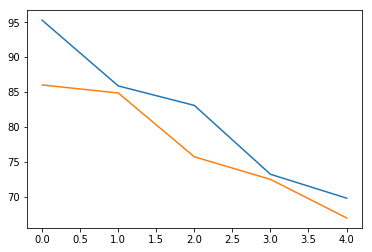

In [91]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [100]:
# build a model to project inputs on the latent space
encoder = Model(encoder_input, z_mean)

In [101]:
x_test.shape

(100, 150, 3)

In [102]:
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
x_test_encoded.shape

(100, 2)

In [103]:
type(x_test_encoded[0,0])

numpy.float32

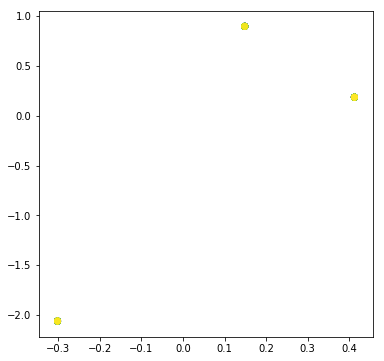

In [104]:
y_test = range(x_test.shape[0])
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)

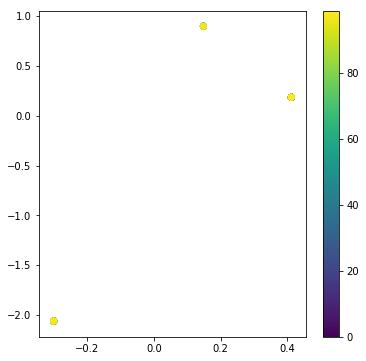

In [105]:
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
plt.figure(figsize=(6, 6))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
plt.colorbar()
plt.show()

In [106]:
# build a digit generator that can sample from the learned distribution
decoder_input = Input(shape=(latent_dim,))
_hid_decoded = decoder_hid(decoder_input)
_up_decoded = decoder_upsample(_hid_decoded)
_reshape_decoded = decoder_reshape(_up_decoded)
_deconv_1_decoded = decoder_deconv_1(_reshape_decoded)
_deconv_2_decoded = decoder_deconv_2(_deconv_1_decoded)
_x_decoded_relu = decoder_deconv_3_upsamp(_deconv_2_decoded)
_x_decoded_mean_squash = decoder_mean_squash(_x_decoded_relu)
generator = Model(decoder_input, _x_decoded_mean_squash)

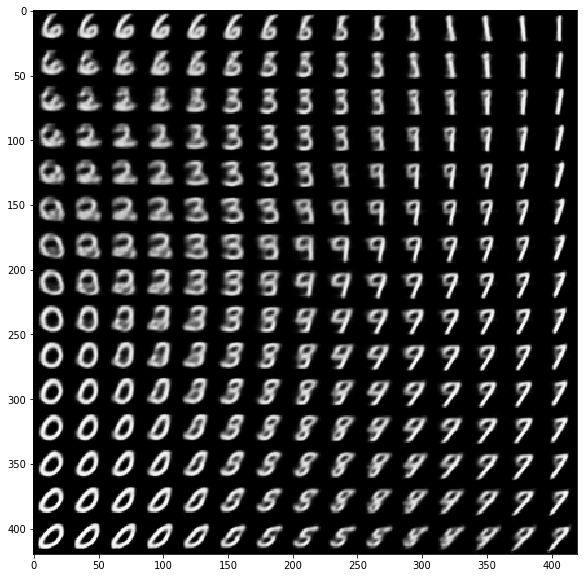

In [35]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        z_sample = np.tile(z_sample, batch_size).reshape(batch_size, 2)
        x_decoded = generator.predict(z_sample, batch_size=batch_size)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()